## Preparation

In [1]:
import warnings
warnings.filterwarnings("ignore")

from pprint import pprint
import re
from tqdm import tqdm

from pandarallel import pandarallel
pandarallel.initialize(nb_workers=12, progress_bar=True)
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 500)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pickle

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
#!pwd
import os

# Google Bucket
# file name checkpoint_0512_sent_split.parquet
path_bucket = 'gs://msca-sp23-bucket/nlp_data'
runtime_path = '/home/anthony/projects/nlp_runtime'
bucket_read = path_bucket + '/' + 'checkpoint_0526_filtered_sentences_sentiment_ner.parquet'

os.chdir(runtime_path)
print(os.getcwd())

/home/anthony/projects/nlp_runtime


In [3]:
df = pd.read_parquet(bucket_read, engine='pyarrow')
df['target_sentiment'] = df['target_sentiment'].apply(pickle.loads)

In [4]:
df.head(2)

,date,title,article_id,sentences,target_sentiment,sentiment,sentiment_score
0,2020-01-01,"Decentralized Machine Learning Reaches Market Cap of $15,919.00 (DML) - Enterprise Leader",1,"Decentralized Machine Learning Reaches Market Cap of 15,919.00 DML Enterprise Leader Daily Ratings News for Decentralized Machine Learning Complete the form below to receive the latest headlines and analysts' mendations for Decentralized Machine Learning with our free daily email newsletter: Follow EnterpriseLeade Recent Posts GE Announces Its Plan To Sell The Distributed Power Business To Advent International Ebang Communication Resorts To The Filing Of An IPO In Hong Kong How to Open DAA, ...","[(Decentralized Machine Learning Reaches Market Cap, ORG, 0.0), (Decentralized Machine Learning, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0)]",neutral,0.999812
0,2020-01-01,"Decentralized Machine Learning Reaches Market Cap of $15,919.00 (DML) - Enterprise Leader",1,3 Ways to Tell if Your Next Business Move will be a Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions At Its Factory Flagstar Bancorp Acquires 52 Retails Branches Belonging To Wells Fargo,"[(Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2), (Flagstar Bancorp, ORG, 0.0), (Wells Fargo, ORG, 0.0)]",neutral,0.999812


## Sentiment Quality Check

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2223016 entries, 0 to 133257
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   date              datetime64[ns]
 1   title             object        
 2   article_id        int64         
 3   sentences         object        
 4   target_sentiment  object        
 5   sentiment         object        
 6   sentiment_score   float32       
dtypes: datetime64[ns](1), float32(1), int64(1), object(4)
memory usage: 127.2+ MB


In [24]:
df['sentiment'].value_counts()

sentiment
neutral     1735701
positive     403518
negative      83797
Name: count, dtype: int64

In [5]:
# replace {'positive':1, 'negative':-1, 'neutral':0}
df['sentiment_value'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else -1 if x == 'negative' else 0)

In [6]:
df[df['sentiment_value'] == -1].sample(5)[['title', 'sentences', 'target_sentiment', 'sentiment']]

,title,sentences,target_sentiment,sentiment
114908,What is Bing with ChatGPT? Here's everything we know | ZDNET,You can also install the Bing Mobile app.,"[(Bing Mobile, ORG, 0.0)]",negative
84162,11 Tech Experts On How Small Businesses Can Effectively Leverage Machine Learning,"Denver Hunter, PenServ Plan Services, Inc. 4.","[(Denver Hunter, PERSON, 0.0), (PenServ Plan Services, Inc. 4, ORG, 0.0)]",negative
115703,Safety and AI — How this Fusion Heralds a New Dawn in Workplace Safety – FocusTechnica,"Be it a food pany or any warehouse, for that matter, life threatening accidents are right around the corner.",[],negative
3316,"Current Trends and Future Demand of Pancreatic Cancer Diagnostics Using Artificial Intelligence Market Top Business Growing Strategies, Technological Innovation and Emerging Trends of Outlook To 2024 – News Parent","The exhaustive analysis of various trends of the global Pancreatic Cancer Diagnostics Using Artificial Intelligence Market to help identify market expansions To Know More About The Assumptions in This Market Report: While each report initially generated is prepared with a set benchmark of the industry, the reports are customizable to meet the requirements of the client.","[(Pancreatic Cancer Diagnostics Using Artificial Intelligence Market, ORG, -0.6)]",negative
62868,How AI helped deliver cash aid to many of the poorest people in Togo - NewsBreak,"PUBLIC HEALTH 1 DAY Internal Twitter Data Reveals How Many People Are Tweeting About CryptoTwitter has e the primary platform for crypto discussion on the internet, and internal data from pany reveals just how many people are joining the conversation.","[(CryptoTwitter, ORG, 0.0)]",negative


In [38]:
df[df['sentiment_value'] == 0].sample(5)[['title', 'sentences', 'target_sentiment', 'sentiment']]

,title,sentences,target_sentiment,sentiment
53040,Duality and Intel Collaborate to Offer Accelerated Homomorphic Encryption-based Machine Learning Applications on Amazon Web Services (AWS),The collaboration focused on accelerating ML applications with HE on the new 3rd Gen Intel Xeon Scalable processors.,"[(ML, ORG, 0.0), (Intel, ORG, 0.0)]",neutral
7627,Global Artificial Intelligence in Military Market Industry Latest Trends & Outlook 2020-2027 – NJ MMA News,Global Artificial Intelligence in Military Therapy Type Segment Analysis 6.,"[(Global Artificial Intelligence in Military Therapy Type Segment Analysis 6, ORG, -0.2333333333333333)]",neutral
64537,Hirose and eTopus Technology Develop Combined PCIe Gen6 64Gbps PAM4 Interconnect Solution for AI Training Applications,"About eTopus Technology Inc. eTopus is an innovator and technology leader in high performance, DSP based, mixed signal, ultra high speed semiconductor interconnect solutions.","[(About eTopus Technology Inc. eTopus, ORG, 0.0), (DSP, ORG, 0.0)]",neutral
125524,"Pausing AI Development Would 'Simply Benefit China,' Says Eric Schmidt","Instead of a pause, he said leaders should collectively discuss appropriate guardrails ""ASAP.""",[],neutral
4820,"Global IoT, Data Management, 5G and Artificial Intelligence Market 2025 – Financial Analyst",For many years Artificial Intelligence AI was just a futuristic concept but with recent progress in Machine Learning capabilities; the AI sector has been firmly pushed into the spotlight.,"[(Artificial Intelligence AI, ORG, -0.6), (Machine Learning, ORG, 0.0), (AI, ORG, 0.0)]",neutral


In [40]:
df[df['sentiment_value'] == 1].sample(5)[['title', 'sentences', 'target_sentiment', 'sentiment']]

,title,sentences,target_sentiment,sentiment
121481,Better Late Than Never: 3 Artificial Intelligence (AI) Stocks That Still Have Massive Upside | Nasdaq,"SentinelOne scores very high on benchmarks such as MITRE's ATT CK Evaluations, and research firm Gartner gave it the top rank in endpoint protection.","[(SentinelOne, ORG, 0.0), (MITRE, ORG, 0.0), (ATT CK Evaluations, ORG, 0.0), (Gartner, PERSON, 0.0)]",positive
14486,ACTO raises $11.5 million to bolster life sciences sales with AI | VentureBeat,ACTO raises 11.5 million to bolster life sciences sales with AI VentureBeat AR/VR Big Data Cloud Commerce Dev Enterprise Entrepreneur Marketing Media Mobile Security Social Transportation The Machine AI Machine Learning Computer Vision Natural Language Processing Robotic Process Automation GamesBeat Newsletters Got a news tip?,"[(ACTO, ORG, 0.0), (AI VentureBeat AR/VR Big Data Cloud Commerce Dev Enterprise Entrepreneur Marketing Media Mobile Security Social Transportation The Machine AI Machine Learning Computer Vision Natural Language Processing Robotic Process Automation GamesBeat Newsletters Got, ORG, 0.008333333333333331)]",positive
71290,Explainable machine learning for precise fatigue crack tip detection - NewsBreak,"A novel variant that predicts a p.Ser76Thr in IGFBP4 Thr allele frequency"" "" 0.02 was identified which associated with the maximum BMI measured during adulthood BMI 39.8"" kg/m2 for Thr allele bined with heterozygotes vs. 36.2"" kg/m2 for Ser allele homozygotes, "" "" 6.7 per Thr allele, p"" "" 8.0"" "" 10 5, adjusted for age, sex, birth year and the first five genetic ponents and the maximum age and sex adjusted BMI z score measured during childhood/adolescence z score 0.70 SD for Thr allele hetero...","[(Ser, PERSON, 0.0), (BMI, ORG, 0.0), (Ser, PERSON, 0.0)]",positive
29076,"Industrial Research on Artificial Intelligence (AI) As a Service Market 2020 with In-depth Analysis of Product Supply and Demand: Google, Amazon web services, IBM, Microsoft, SAP, Salesforce, and more – Redhill Market Analytics",A Artificial Intelligence AI As a Service Market provides an extensive view of size; trends and shape have been developed in this report to identify factors that will exhibit a significant impact in boosting the sales of Artificial Intelligence AI As a Service Market in the near future.,"[(Artificial Intelligence AI, ORG, -0.6)]",positive
14905,Great Learning collaborates with Northwestern University to launch online 'Master of Science in Data Science Programme' | Business,"When Di Maio appeare... Zimbabwe protest organiser, journalist freed on bail, banned from posting on Twitter A Zimbabwe opposition politician and a journalist detained for more than a month on suspicion of planning anti government protests over corruption and the worst economic crisis in more than a decade were released on bail on Wednesday.","[(Di Maio appeare, PERSON, 0.0), (Zimbabwe, GPE, 0.0), (Zimbabwe, GPE, 0.0)]",positive


Most sentences are neutral. The performance comparsion between target_sentiment (by spacy & textblob) and single sentence sentiment (by distil-bert) obviously differ.
- single sentence sentiment is still valuable because some setences have no entities (e.g. 'it cannot learn to love' for AI) and has a negative sentiment
- target_sentiment tends to lose some context like the Di Maio one. He is released, while the target_sentiment identified no sentiments towards entitites; however, the event (sentence) is overall in a positive tone

## Aggregate Sentence Sentiments

In [45]:
# prepare main df
bucket_read = path_bucket + '/' + 'checkpoint_0525_full_article_split.parquet'
df_main = pd.read_parquet(bucket_read, engine='pyarrow')

df_main.shape

(133258, 9)

In [47]:
# drop unnecessary columns
df_main.drop(columns=['entities', 'sentences', 'url'], inplace=True)
df_main.head(2)

,date,title,text_cleaned,article_topic,domain,article_id
0,2020-01-01,"Decentralized Machine Learning Reaches Market Cap of $15,919.00 (DML) - Enterprise Leader","Decentralized Machine Learning Reaches Market Cap of 15,919.00 DML Enterprise Leader Daily Ratings News for Decentralized Machine Learning Complete the form below to receive the latest headlines and analysts' mendations for Decentralized Machine Learning with our free daily email newsletter: Follow EnterpriseLeade Recent Posts GE Announces Its Plan To Sell The Distributed Power Business To Advent International Ebang Communication Resorts To The Filing Of An IPO In Hong Kong How to Open DAA, ...",3,theenterpriseleader.com,1
1,2020-01-01,"Artificial Intelligence (AI) in Marketing Market Scope, Size, Share, Trends, Forecast by 2026 – Market Reports Observer","Artificial Intelligence AI in Marketing Market Scope, Size, Share, Trends, Forecast by 2026 Market Reports Observer Skip to content 488 E 11th Ave, Eugene, OR 97401, USA 1 541 687 2347 email protected Market Reports Observer Artificial intelligence AI is the ability to process information in a way similar to the thought process of humans in learning, decision making, and problem solving. Enterprises are now identifying the value associated with integrating AI into their business processes. ...",1,marketreportobserver.com,2


First, we have to clean the sentiments:

Solution#1
- reduce sentiments with score lower than 90.
- group by article_id and get count of three types of sentiments
- choose the sentiment with highst counts;
    - if we have a tie, then give it `neutral`
    - but the issue is that sometimes highest counts lie (e.g. pos:113, negative:112, neutral:22), we can't call it a positive article simply because pos has highest counts

Solution#2
- replace sentiment label with value: {positive:1, negative:-1, neutral:0}
- calculate article average based on article_id
- if abs(sentiment) > 1.3, then we call it either positive or negative


In [41]:
# select setence df
sentences = df[['article_id', 'sentences', 'sentiment_value', 'sentiment_score']]
sentences.head(2)

,article_id,sentences,sentiment_value,sentiment_score
0,1,"Decentralized Machine Learning Reaches Market Cap of 15,919.00 DML Enterprise Leader Daily Ratings News for Decentralized Machine Learning Complete the form below to receive the latest headlines and analysts' mendations for Decentralized Machine Learning with our free daily email newsletter: Follow EnterpriseLeade Recent Posts GE Announces Its Plan To Sell The Distributed Power Business To Advent International Ebang Communication Resorts To The Filing Of An IPO In Hong Kong How to Open DAA, ...",0,0.999812
0,1,3 Ways to Tell if Your Next Business Move will be a Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions At Its Factory Flagstar Bancorp Acquires 52 Retails Branches Belonging To Wells Fargo,0,0.999812


In [42]:
# remove rows that has sentiment_score < 0.90
prior_len = sentences.shape[0]
sentences = sentences[sentences['sentiment_score'] >= 0.90]
print(f'Prior length: {prior_len}, after length: {sentences.shape[0]}')

Prior length: 2223016, after length: 2102156


In [43]:
# group by article_id, calculate avg sentiment_value
sentences_gb = sentences.groupby('article_id').agg({'sentiment_value': 'mean'}).reset_index()
sentences_gb.head(2)

,article_id,sentiment_value
0,1,0.0
1,3,0.0


In [44]:
# check length
sentences_gb.shape[0]

124222

In [48]:
# left join df_main and sentences_gb
df_main = df_main.merge(sentences_gb, how='left', on='article_id')

In [50]:
df_main.sentiment_value.isna().value_counts()

sentiment_value
False    124222
True       9036
Name: count, dtype: int64

Not too much null sentiments. Don't have to worry much.

In [51]:
# # save a checkpoint
# bucket_write = path_bucket + '/' + 'checkpoint_0526_main.parquet'
# df_main.to_parquet(bucket_write, engine='pyarrow')

## Aggregate Target Sentiment and Entities

In [7]:
# select setence df
target_sentiment = df[['article_id', 'sentences', 'target_sentiment']]
target_sentiment.head(2)

,article_id,sentences,target_sentiment
0,1,"Decentralized Machine Learning Reaches Market Cap of 15,919.00 DML Enterprise Leader Daily Ratings News for Decentralized Machine Learning Complete the form below to receive the latest headlines and analysts' mendations for Decentralized Machine Learning with our free daily email newsletter: Follow EnterpriseLeade Recent Posts GE Announces Its Plan To Sell The Distributed Power Business To Advent International Ebang Communication Resorts To The Filing Of An IPO In Hong Kong How to Open DAA, ...","[(Decentralized Machine Learning Reaches Market Cap, ORG, 0.0), (Decentralized Machine Learning, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0)]"
0,1,3 Ways to Tell if Your Next Business Move will be a Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions At Its Factory Flagstar Bancorp Acquires 52 Retails Branches Belonging To Wells Fargo,"[(Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2), (Flagstar Bancorp, ORG, 0.0), (Wells Fargo, ORG, 0.0)]"


helper functions

In [8]:
'''
TODO: the column 'target_sentiment' will be aggregated
OUTPUT: the ideal output should be a tuple (Name, Label, Sentiment_Polarity, Count of Occurrence)
PROCESS: 1/ for each artile_id, we first append all target_sentiment into a list
         2/ then we count the occurence of each sentiment and add each frequency to the corresponding tuple
         3/ calculate the average sentiment polarity
         4/ sort by 1. count of occurence, 2. sentiment polarity
'''

"\nTODO: the column 'target_sentiment' will be aggregated\nOUTPUT: the ideal output should be a tuple (Name, Label, Sentiment_Polarity, Count of Occurrence)\nPROCESS: 1/ for each artile_id, we first append all target_sentiment into a list\n         2/ then we count the occurence of each sentiment and add each frequency to the corresponding tuple\n         3/ calculate the average sentiment polarity\n         4/ sort by 1. count of occurence, 2. sentiment polarity\n"

In [9]:
# group by article_id, append all target_sentiment into a list
target_sentiment_gb = target_sentiment.groupby('article_id').agg({'target_sentiment': 'sum'}).reset_index()
target_sentiment_gb.head(2)

,article_id,target_sentiment
0,1,"[(Decentralized Machine Learning Reaches Market Cap, ORG, 0.0), (Decentralized Machine Learning, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0), (Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2), (Flagstar Bancorp, ORG, 0.0), (Wells Fargo, ORG, 0.0), (Monster Beverage Corp NASDAQ, ORG, 0.0), (GE, ORG, 0.0), (IPO, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0), (Decentralized Machine Learning Daily Enter, ORG,..."
1,2,"[(Intelligence AI, ORG, 0.0), (Natural Language Processing NLP, ORG, 0.1), (North America, LOC, 0.0), (Intelligence AI, ORG, 0.0), (Intelligence AI, ORG, 0.0), (Intelligence AI, ORG, 0.0), (North America, LOC, 0.0), (South America, LOC, 0.0), (Europe, LOC, 0.0), (Asia Pacific, LOC, 0.0), (Middle East Africa, LOC, 0.0), (Intelligence AI, ORG, 0.0), (Artificial Intelligence AI in Marketing Market, ORG, -0.6), (IBM Corporation, ORG, 0.0), (Google Inc., ORG, 0.0), (Inc., ORG, 0.0), (Albert Techn..."


In [10]:
# write a function to count the occurence of each entity tuple and add each frequency to the corresponding tuple
# it also calculates the average sentiment polarity

def target_sentiment_aggregator(sentiment_list):
    '''
    INPUT: a list of tuples. For example: (Google, ORG, 1.0)
    OUTPUT: a list of tuples. (Name, Label, Sentiment_Polarity, Count of Occurrence). For example: [(Google, ORG, 1.0, 2), (Apple, ORG, 0.5, 1)]
    '''
    
    if len(target_sentiment) > 0:
        # create a dictionary to store the count of occurence of each tuple
        # create a dictionary to store the sum of sentiment polarity of each tuple
        sentiment_dict, sentiment_polarity_dict = {}, {}
        for pair in sentiment_list:
            if pair in sentiment_dict:
                sentiment_dict[pair] += 1
            else:
                sentiment_dict[pair] = 1
            if pair in sentiment_polarity_dict:
                sentiment_polarity_dict[pair] += pair[2]
            else:
                sentiment_polarity_dict[pair] = pair[2]
        # create a list of tuples. (Name, Label, Sentiment_Polarity, Count of Occurrence)
        sentiment_agg = []
        for key, value in sentiment_dict.items():
            sentiment_agg.append((key[0], key[1], sentiment_polarity_dict[key]/value, value))
        # sort by 1. count of occurence, 2. sentiment polarity
        sentiment_agg.sort(key=lambda x: (x[3], x[2]), reverse=True)
    else:
        sentiment_agg = []
    return sentiment_agg

In [ ]:
# test = target_sentiment_gb.head(10)
# test['aggregate_target_sentiment'] = test['target_sentiment'].parallel_apply(target_sentiment_aggregator)

In [13]:
# apply on the target_sentiment_gb df
target_sentiment_gb['aggregate_target_sentiment'] = target_sentiment_gb['target_sentiment'].parallel_apply(target_sentiment_aggregator)

In [14]:
target_sentiment_gb.head(3)

,article_id,target_sentiment,aggregate_target_sentiment
0,1,"[(Decentralized Machine Learning Reaches Market Cap, ORG, 0.0), (Decentralized Machine Learning, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0), (Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2), (Flagstar Bancorp, ORG, 0.0), (Wells Fargo, ORG, 0.0), (Monster Beverage Corp NASDAQ, ORG, 0.0), (GE, ORG, 0.0), (IPO, ORG, 0.0), (Hong Kong, GPE, 0.0), (NRG, ORG, 0.0), (IMG, ORG, 0.0), (Decentralized Machine Learning Daily Enter, ORG,...","[(Decentralized Machine Learning, ORG, 0.0, 11), (US, GPE, 0.0, 4), (Hong Kong, GPE, 0.0, 2), (NRG, ORG, 0.0, 2), (IMG, ORG, 0.0, 2), (Flagstar Bancorp, ORG, 0.0, 2), (IDEX, ORG, 0.0, 2), (Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2, 2), (Stellar XLM, ORG, 0.25, 1), (Decentralized Machine Learning Reaches Market Cap, ORG, 0.0, 1), (Wells Fargo, ORG, 0.0, 1), (Monster Beverage Corp NASDAQ, ORG, 0.0, 1), (GE, ORG, 0.0, 1), (IPO, ORG, 0.0, 1), (De..."
1,2,"[(Intelligence AI, ORG, 0.0), (Natural Language Processing NLP, ORG, 0.1), (North America, LOC, 0.0), (Intelligence AI, ORG, 0.0), (Intelligence AI, ORG, 0.0), (Intelligence AI, ORG, 0.0), (North America, LOC, 0.0), (South America, LOC, 0.0), (Europe, LOC, 0.0), (Asia Pacific, LOC, 0.0), (Middle East Africa, LOC, 0.0), (Intelligence AI, ORG, 0.0), (Artificial Intelligence AI in Marketing Market, ORG, -0.6), (IBM Corporation, ORG, 0.0), (Google Inc., ORG, 0.0), (Inc., ORG, 0.0), (Albert Techn...","[(Intelligence AI, ORG, 0.0, 9), (North America, LOC, 0.0, 3), (South America, LOC, 0.0, 2), (Europe, LOC, 0.0, 2), (Middle East Africa, LOC, 0.0, 2), (Inc., ORG, 0.0, 2), (AI, ORG, 0.0, 2), (Artificial Intelligence AI, ORG, -0.6, 2), (Natural Language Processing NLP, ORG, 0.1, 1), (Asia Pacific, LOC, 0.0, 1), (IBM Corporation, ORG, 0.0, 1), (Google Inc., ORG, 0.0, 1), (Albert Technologies, PERSON, 0.0, 1), (Intel Corporation, ORG, 0.0, 1), (Microsoft Corporation, ORG, 0.0, 1), (NVIDIA Corpo..."
2,3,"[(Lisk Machine Learning, ORG, 0.0), (Lisk Machine Learning s, ORG, 0.0), (Lisk Machine Learning s, ORG, 0.0), (gny io, PERSON, 0.0), (Lisk Machine Learning, ORG, 0.0), (Lisk Machine Learning, ORG, 0.0), (U.S., GPE, 0.0), (Lisk Machine Learning Daily Enter, ORG, 0.0), (Lisk Machine Learning, ORG, 0.0), (Bitcoin or, ORG, 0.0), (Lisk Machine Learning, ORG, 0.0), (Atmos Energy Co., ORG, 0.0), (SeaTown Holdings Pte, ORG, 0.0), (Diabetes Patients and Advocates Fight Back Against Skyrocketing Insul...","[(Lisk Machine Learning, ORG, 0.0, 12), (U.S., GPE, 0.0, 3), (Lisk Machine Learning s, ORG, 0.0, 2), (US, GPE, 0.0, 2), (Stellar XLM, ORG, 0.25, 1), (Lisk Machine Learning Complete, ORG, 0.1, 1), (gny io, PERSON, 0.0, 1), (Lisk Machine Learning Daily Enter, ORG, 0.0, 1), (Bitcoin or, ORG, 0.0, 1), (Atmos Energy Co., ORG, 0.0, 1), (SeaTown Holdings Pte, ORG, 0.0, 1), (Diabetes Patients and Advocates Fight Back Against Skyrocketing Insulin Prices Lowe s Sales, ORG, 0.0, 1), (Bitcoin or Ethereu..."


In [17]:
target_sentiment_gb.shape

(131714, 2)

In [18]:
# save a checkpoint
bucket_read = path_bucket + '/' + 'checkpoint_0526_main.parquet'
df_main = pd.read_parquet(bucket_read, engine='pyarrow')

In [ ]:
# select only article_id and aggregate_target_sentiment
target_sentiment_gb = target_sentiment_gb[['article_id', 'aggregate_target_sentiment']]

In [19]:
# left join df_main and target_sentiment_gb
df_main = df_main.merge(target_sentiment_gb, how='left', on='article_id')

In [ ]:
# test = df.head(10)
# test['sentiment_value'] = test['sentiment_value'].fillna(test['aggregate_target_sentiment'].parallel_apply(extract_sentiment_avg))
# test.head(10)

In [ ]:
# import pickle
# bucket_read = path_bucket + '/' + 'checkpoint_0526_main.parquet'
# df = pd.read_parquet(bucket_read, engine='pyarrow')
# df['aggregate_target_sentiment'] = df['aggregate_target_sentiment'].apply(pickle.loads)

In [28]:
# if the 'sentiment_value' is NaN, then set it to the average of top 10 results of 'aggregate_target_sentiment'

def extract_sentiment_avg(tgt_sentiment_list):
    '''
    Input: an aggregate_target_sentiment list
    Output: the average of the top 10 sentiment tuples' polarity
    '''
    if (isinstance(tgt_sentiment_list, list)) and (len(tgt_sentiment_list) > 0):
        top_10 = tgt_sentiment_list[:10]
        polarity_sum = 0
        for tup in top_10:
            polarity_sum += tup[2]
        return polarity_sum/10
    else:
        return None

In [29]:
df['sentiment_value'] = df['sentiment_value'].fillna(df['aggregate_target_sentiment'].parallel_apply(extract_sentiment_avg))

In [30]:
df['sentiment_value'].isna().value_counts()

sentiment_value
False    131713
True       1545
Name: count, dtype: int64

If the sentiment_value is still None/NaN, it indicates that neither the single sentences is certain (score>0.9) about its sentiment nor there're any entities identified with sentiments within that artile.

In [31]:
# drop na
df = df.dropna(subset=['sentiment_value'])

In [33]:
# # save a checkpoint
# # Assuming `df` is your DataFrame and `col` is the column with the complex datatype
# df['aggregate_target_sentiment'] = df['aggregate_target_sentiment'].apply(pickle.dumps)

# # Then you can save the DataFrame as parquet
# bucket_write = path_bucket + '/' + 'checkpoint_0526_main.parquet'
# df.to_parquet(bucket_write, engine='pyarrow')

## Analysis of Project Questions

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# set up the figure size: font size (12). title font size (14), label size (10)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 10

In [4]:
import pickle
bucket_read = path_bucket + '/' + 'checkpoint_0526_main.parquet'
df = pd.read_parquet(bucket_read, engine='pyarrow')
df['aggregate_target_sentiment'] = df['aggregate_target_sentiment'].apply(pickle.loads)

In [5]:
df.head(2)

,date,title,text_cleaned,article_topic,domain,article_id,sentiment_value,aggregate_target_sentiment
0,2020-01-01,"Decentralized Machine Learning Reaches Market Cap of $15,919.00 (DML) - Enterprise Leader","Decentralized Machine Learning Reaches Market Cap of 15,919.00 DML Enterprise Leader Daily Ratings News for Decentralized Machine Learning Complete the form below to receive the latest headlines and analysts' mendations for Decentralized Machine Learning with our free daily email newsletter: Follow EnterpriseLeade Recent Posts GE Announces Its Plan To Sell The Distributed Power Business To Advent International Ebang Communication Resorts To The Filing Of An IPO In Hong Kong How to Open DAA, ...",3,theenterpriseleader.com,1,0.00,"[(Decentralized Machine Learning, ORG, 0.0, 11), (US, GPE, 0.0, 4), (Hong Kong, GPE, 0.0, 2), (NRG, ORG, 0.0, 2), (IMG, ORG, 0.0, 2), (Flagstar Bancorp, ORG, 0.0, 2), (IDEX, ORG, 0.0, 2), (Mistake Foxconn Launches Investigation After Reports Of Harsh Working Conditions, ORG, -0.2, 2), (Stellar XLM, ORG, 0.25, 1), (Decentralized Machine Learning Reaches Market Cap, ORG, 0.0, 1), (Wells Fargo, ORG, 0.0, 1), (Monster Beverage Corp NASDAQ, ORG, 0.0, 1), (GE, ORG, 0.0, 1), (IPO, ORG, 0.0, 1), (De..."
1,2020-01-01,"Artificial Intelligence (AI) in Marketing Market Scope, Size, Share, Trends, Forecast by 2026 – Market Reports Observer","Artificial Intelligence AI in Marketing Market Scope, Size, Share, Trends, Forecast by 2026 Market Reports Observer Skip to content 488 E 11th Ave, Eugene, OR 97401, USA 1 541 687 2347 email protected Market Reports Observer Artificial intelligence AI is the ability to process information in a way similar to the thought process of humans in learning, decision making, and problem solving. Enterprises are now identifying the value associated with integrating AI into their business processes. ...",1,marketreportobserver.com,2,-0.05,"[(Intelligence AI, ORG, 0.0, 9), (North America, LOC, 0.0, 3), (South America, LOC, 0.0, 2), (Europe, LOC, 0.0, 2), (Middle East Africa, LOC, 0.0, 2), (Inc., ORG, 0.0, 2), (AI, ORG, 0.0, 2), (Artificial Intelligence AI, ORG, -0.6, 2), (Natural Language Processing NLP, ORG, 0.1, 1), (Asia Pacific, LOC, 0.0, 1), (IBM Corporation, ORG, 0.0, 1), (Google Inc., ORG, 0.0, 1), (Albert Technologies, PERSON, 0.0, 1), (Intel Corporation, ORG, 0.0, 1), (Microsoft Corporation, ORG, 0.0, 1), (NVIDIA Corpo..."


### Counts of Publication over time

In [20]:
# convert date to YYYY-MM format
df_tmp = df[['article_id', 'date']]
df_tmp['date'] = df_tmp['date'].dt.strftime('%Y-%m')

# group by week to get the count of articles
df_month = df_tmp.groupby('date').agg({'article_id': 'count'}).reset_index()
df_month.head(2)

,date,article_id
0,2020-01,1866
1,2020-02,1835


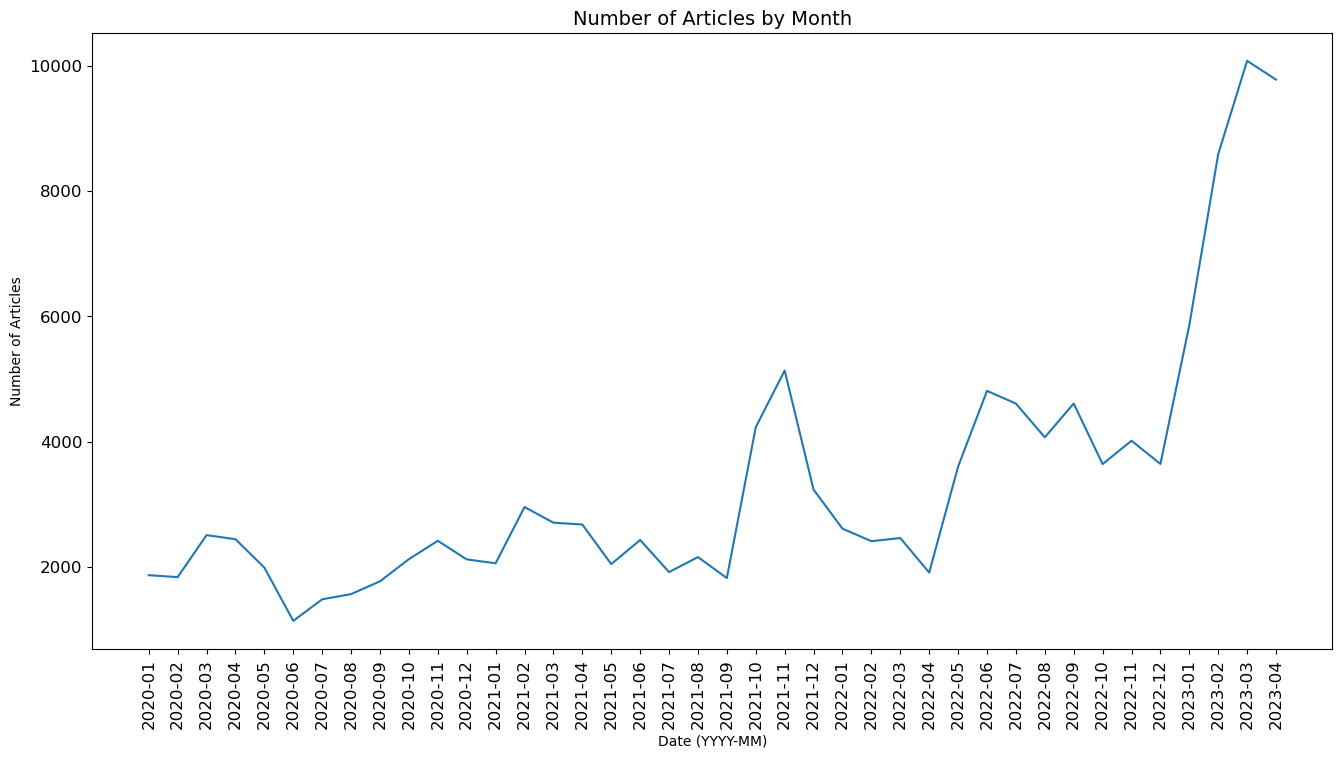

In [22]:
# use matplotlib to make a time series plot
plt.figure(figsize=(16, 8))
plt.plot(df_month['date'], df_month['article_id'])
plt.title('Number of Articles by Month')
# rotate the xticks
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.show()

### Sentiment Change overtime

In [6]:
# create a temp df
df_tmp = df[['article_id', 'date', 'sentiment_value']]

# convert date to YYYY-MM format
df_tmp['month'] = df_tmp['date'].dt.strftime('%Y-%m')

# groupby 'month' to calculate the average sentiment value
df_month = df_tmp.groupby('month').agg({'sentiment_value': 'mean'}).reset_index()
df_month.head(2)

,month,sentiment_value
0,2020-01,0.127906
1,2020-02,0.142418


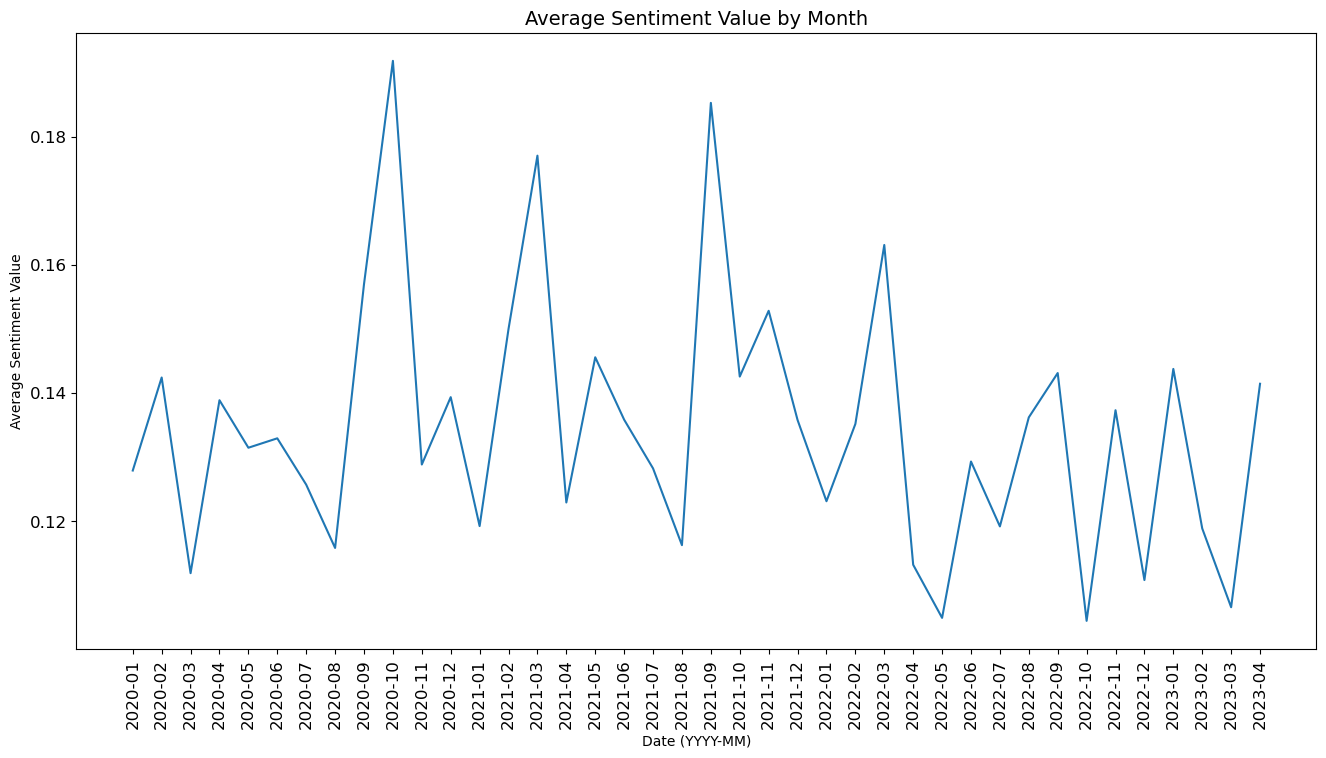

In [7]:
# use matplotlib to make a time series plot
plt.figure(figsize=(16, 8))
plt.plot(df_month['month'], df_month['sentiment_value'])
plt.title('Average Sentiment Value by Month')
# rotate the xticks
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Average Sentiment Value')
plt.xticks(rotation=90)
plt.show()

## Sentiment change over time, with scale of publications (热度)

We can combine the two plots above:
$Heatness_{monthly} = avg\_sentiment \times monthly\_publications$

In [8]:
# create a temp df
df_tmp = df[['article_id', 'date', 'sentiment_value']]

# convert date to YYYY-MM format
df_tmp['month'] = df_tmp['date'].dt.strftime('%Y-%m')

# groupby 'month' to calculate the average sentiment value
df_month = df_tmp.groupby('month').agg({'sentiment_value': 'mean', 'article_id': 'count'}).reset_index()
df_month['heatness'] = df_month['sentiment_value'] * df_month['article_id']
df_month.head(2)

,month,sentiment_value,article_id,heatness
0,2020-01,0.127906,1819,232.660304
1,2020-02,0.142418,1808,257.491162


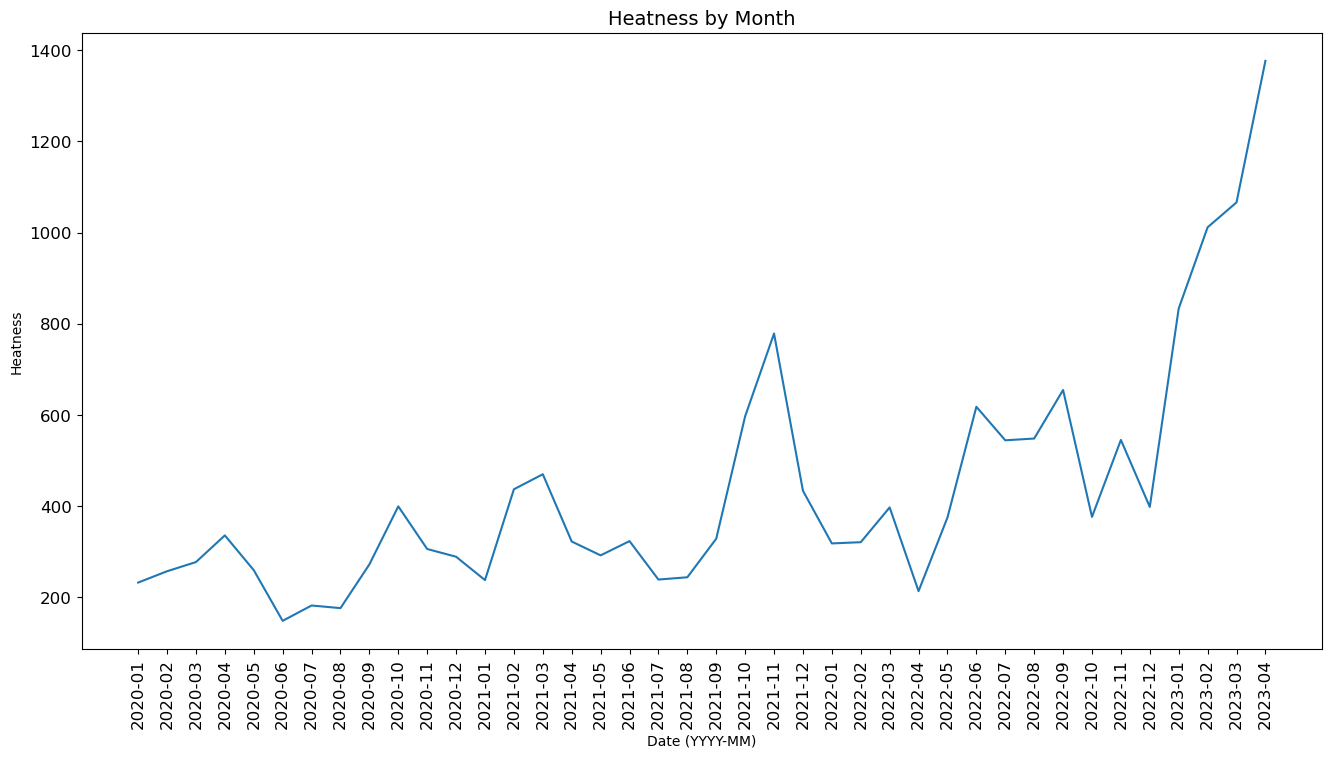

In [9]:
# use matplotlib to make a time series plot
plt.figure(figsize=(16, 8))
plt.plot(df_month['month'], df_month['heatness'])
plt.title('Heatness by Month')
# rotate the xticks
plt.xlabel('Date (YYYY-MM)')
plt.ylabel('Heatness')
plt.xticks(rotation=90)
plt.show()